In [1]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
path = '../data/graphs/kw34/results'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    df['bootstrap_jsd'] = df['bootstrap_jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'bootstrap_jsd':'inverse_bootstrap_jsd'}, inplace = True)

    return df

df = build_df_from_csvs(path)
df.head()

,Checkpoint,inverse_bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,1.000000,0.994230,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
1,20,1.000000,0.978541,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
2,30,0.986457,0.976104,3,0.792277,0.000000,100,3,0.3,modifiedrandomwalk,cw
3,40,0.984815,0.956944,2,0.931105,-0.061798,100,3,0.3,modifiedrandomwalk,cw
4,50,0.974824,0.951358,3,0.845357,-0.034217,100,3,0.3,modifiedrandomwalk,cw


In [6]:
sns.set_theme(style="darkgrid")

checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

In [10]:
df_overview = pd.melt(df, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')

df_overview.head()

,Checkpoint,k,log,Measure,Performance
0,10,3,0.3,ari,1.000000
1,20,3,0.3,ari,1.000000
2,30,3,0.3,ari,0.000000
3,40,3,0.3,ari,-0.061798
4,50,3,0.3,ari,-0.034217


In [11]:
df_overview['Measure'] = pd.Categorical(df_overview['Measure'], ['ari', 'ijsd', 'gambette', 'inverse_bootstrap_jsd'])
df_overview = df_overview.sort_values('Measure')
df_overview.head()

,Checkpoint,k,log,Measure,Performance
0,10,3,0.3,ari,1.000000
70365,400,20,0.3,ari,0.926798
70364,300,20,0.3,ari,0.866246
70363,200,20,0.3,ari,0.648787
70362,100,20,0.3,ari,0.717880


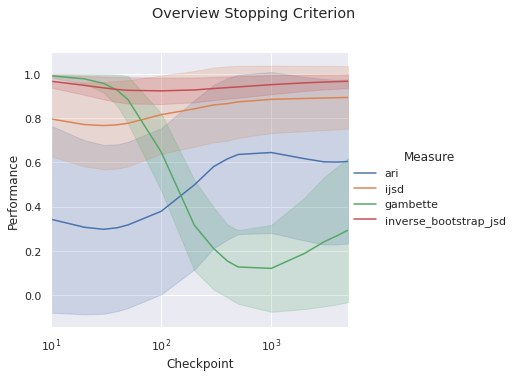

In [12]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Performance', hue='Measure', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview Stopping Criterion')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

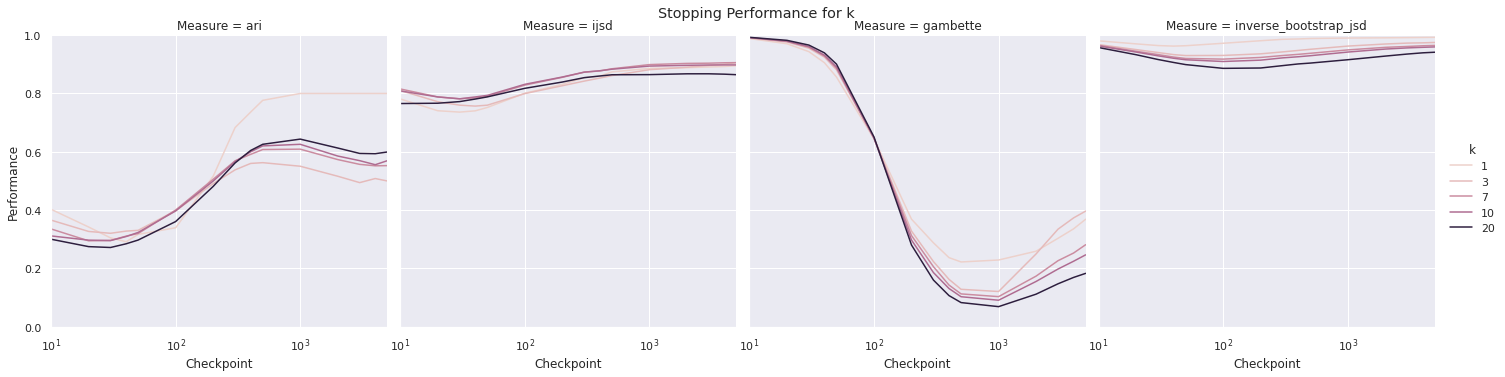

In [14]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Stopping Performance for k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

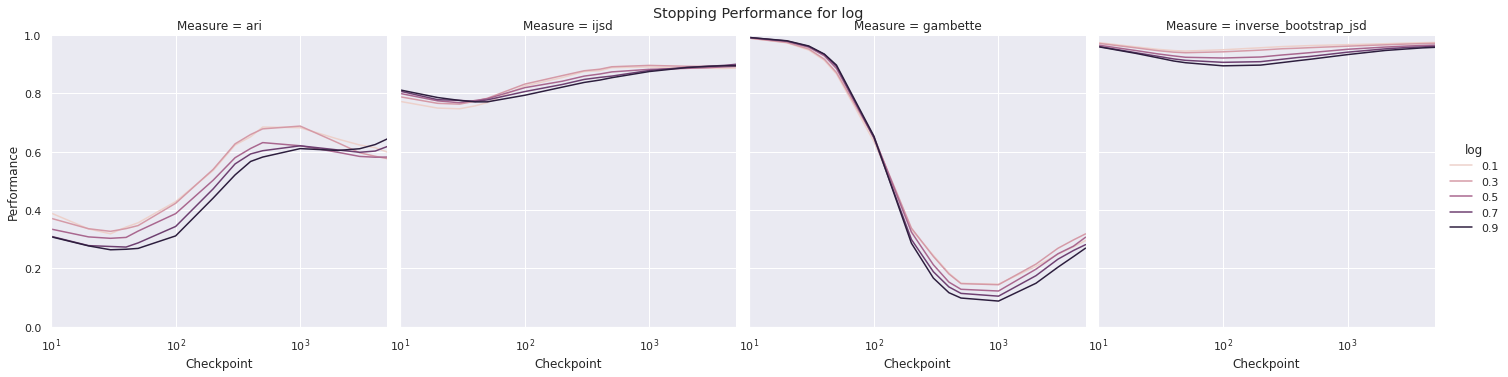

In [15]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Stopping Performance for log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

In [17]:
del(df_overview)

NameError: name 'df_overview' is not defined

In [20]:
df_st = pd.melt(df, id_vars=['Checkpoint', 'Sampling', 'k', 'log'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')

df_st.head()

,Checkpoint,Sampling,k,log,Measure,Performance
0,10,modifiedrandomwalk,3,0.3,ari,1.000000
1,20,modifiedrandomwalk,3,0.3,ari,1.000000
2,30,modifiedrandomwalk,3,0.3,ari,0.000000
3,40,modifiedrandomwalk,3,0.3,ari,-0.061798
4,50,modifiedrandomwalk,3,0.3,ari,-0.034217


In [36]:
df_st['Sampling'] = pd.Categorical(df_st['Sampling'], ['randomsampling', 'randomwalk', 'pagerank', 'modifiedrandomwalk', 'merandomwalk', 'dwug'])
df_st['Measure'] = pd.Categorical(df_st['Measure'], ['ari', 'ijsd', 'gambette', 'inverse_bootstrap_jsd'])
df_st = df_st.sort_values(['Sampling', 'Measure'])
df_st.head()

,Checkpoint,Sampling,k,log,Measure,Performance
6113,3000,randomsampling,7,0.7,ari,0.580857
6114,4000,randomsampling,7,0.7,ari,0.613044
6115,5000,randomsampling,7,0.7,ari,0.587005
6102,20,randomsampling,7,0.7,ari,0.016777
6101,10,randomsampling,7,0.7,ari,0.020145


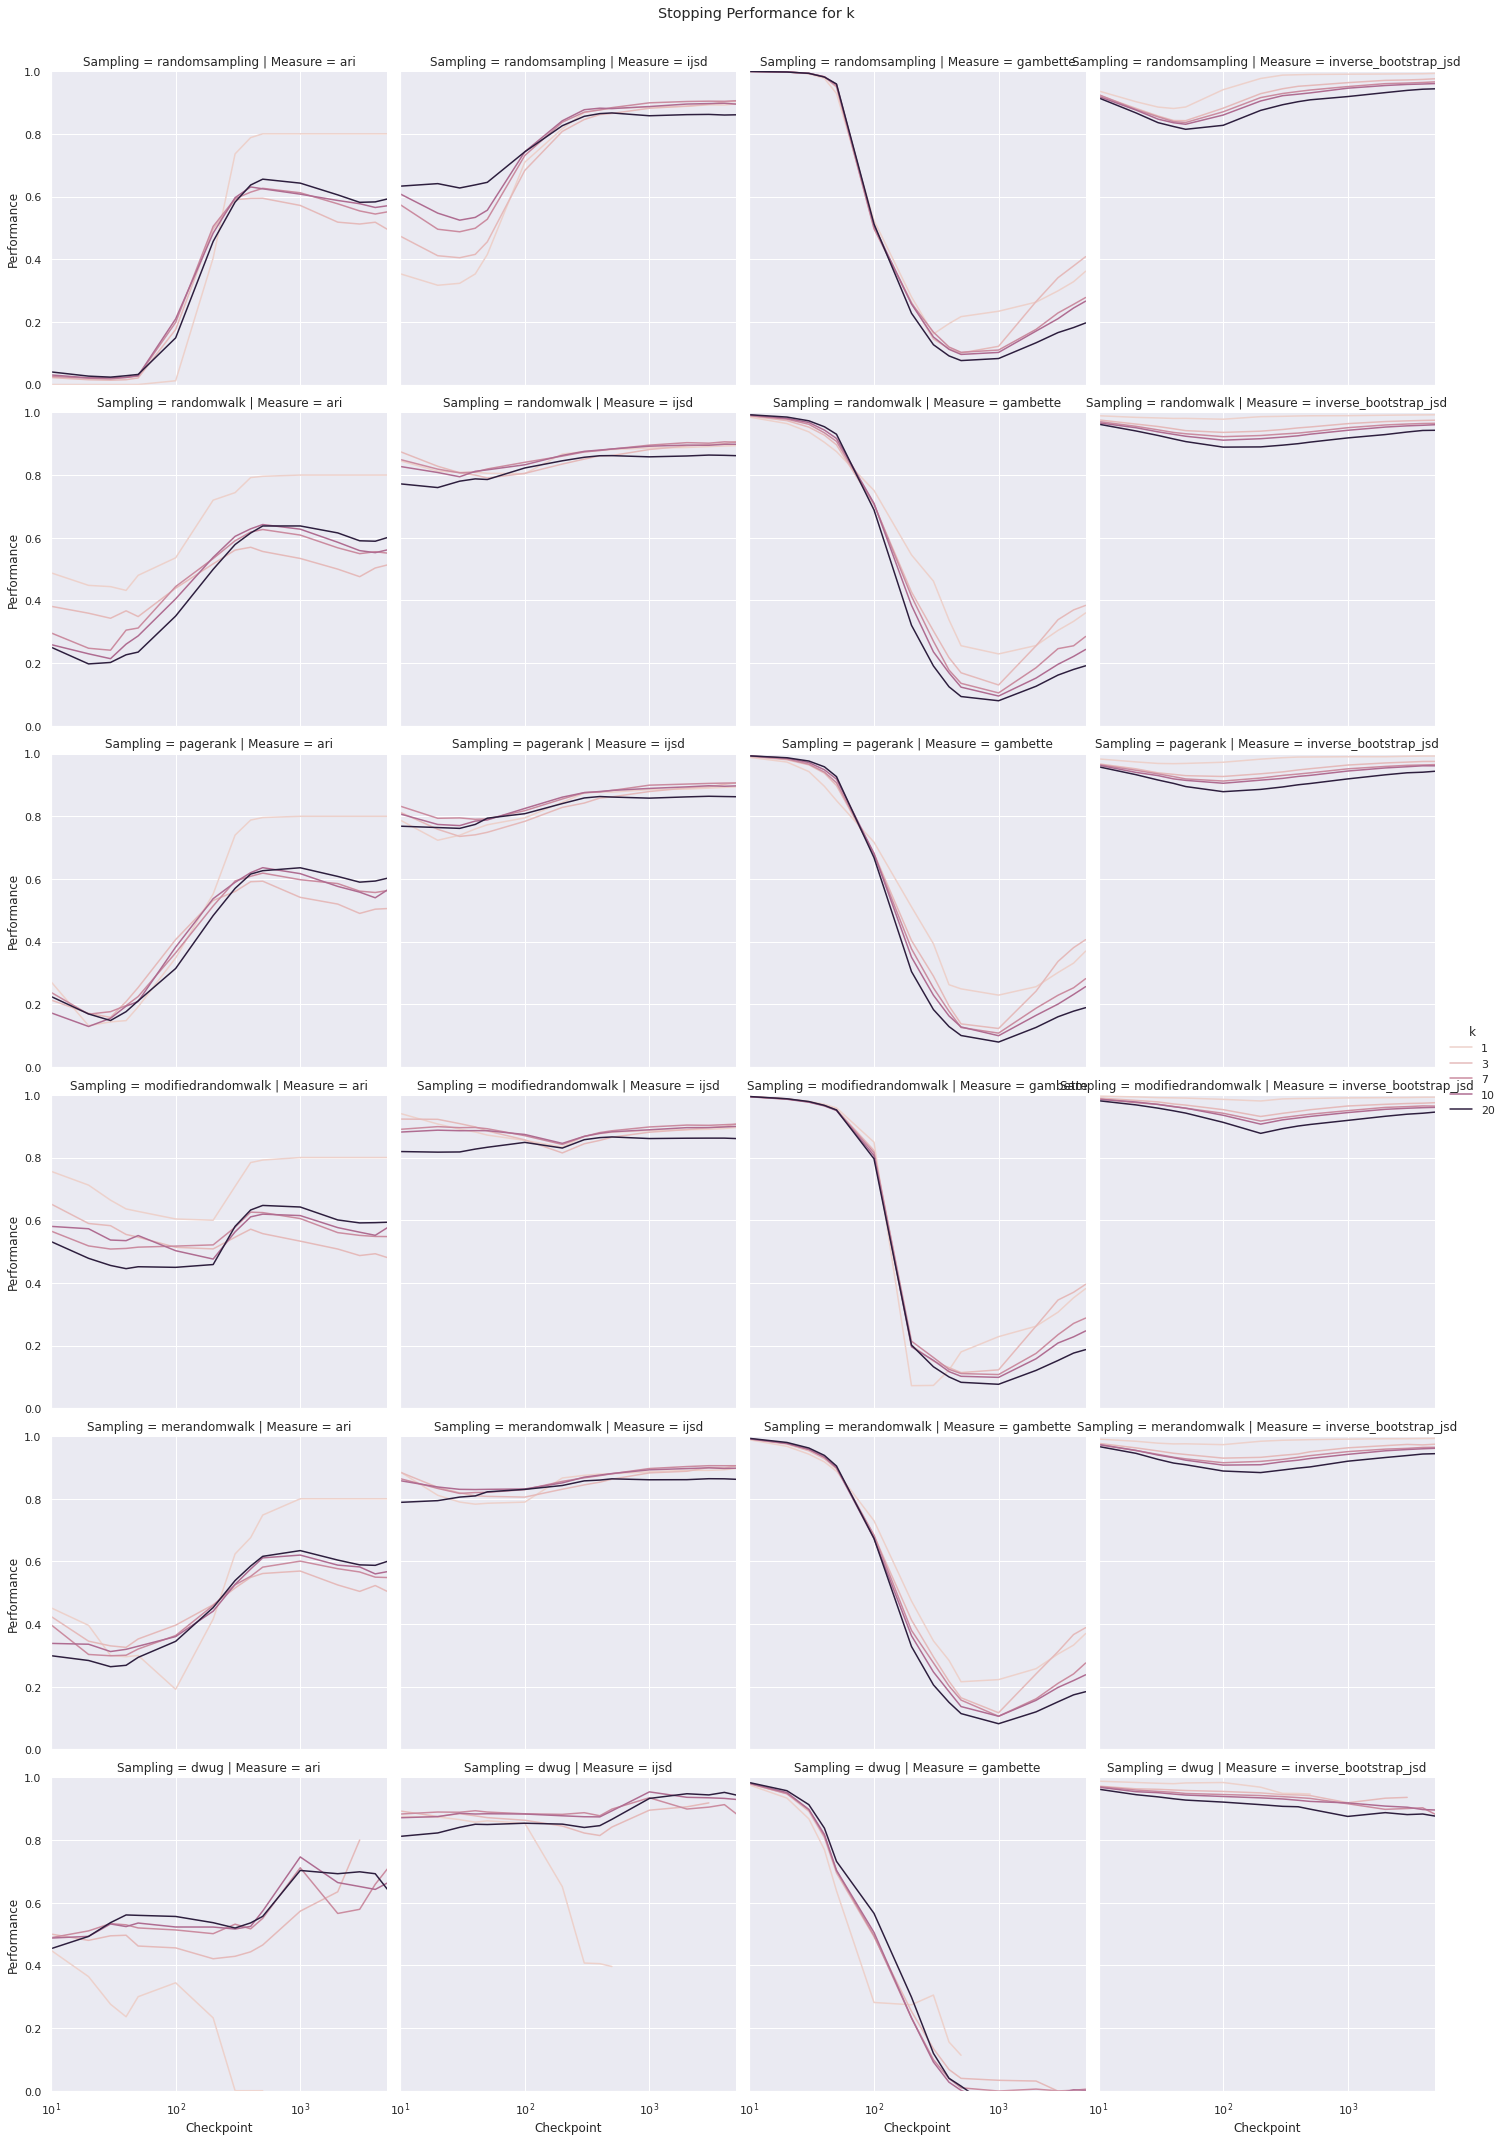

In [40]:
rp = sns.relplot(data=df_st,
    x='Checkpoint', y='Performance', hue='k', row='Sampling', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Stopping Performance for k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

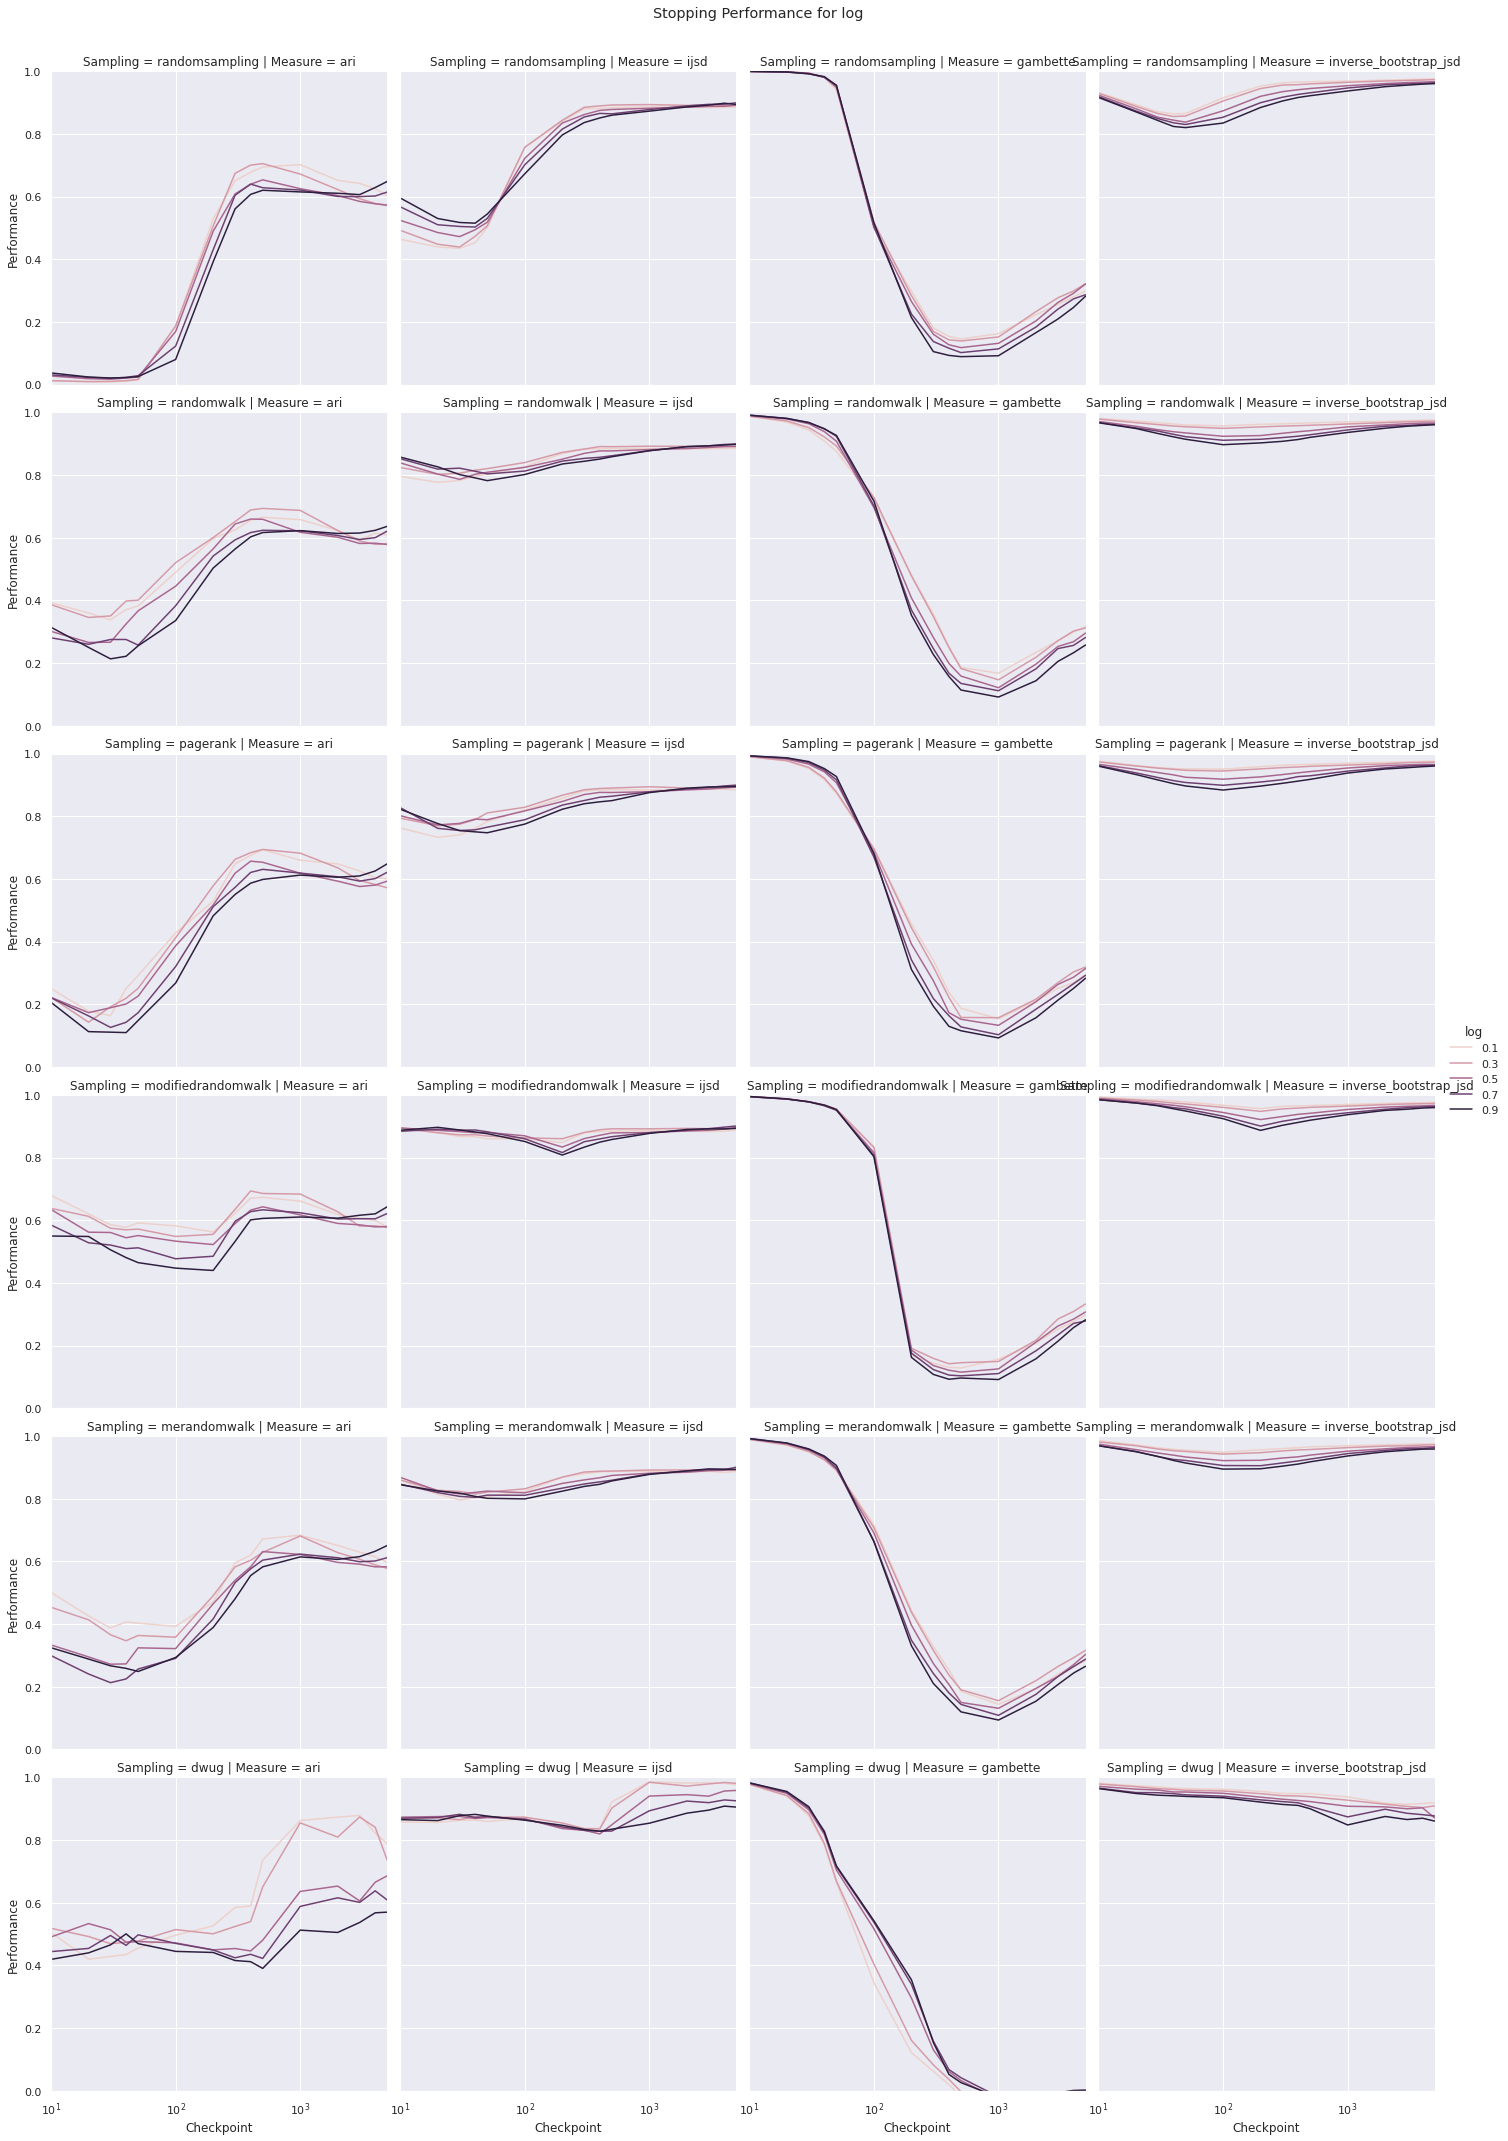

In [41]:
rp = sns.relplot(data=df_st,
    x='Checkpoint', y='Performance', hue='log', row='Sampling', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Stopping Performance for log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

In [42]:
del(df_st)

In [43]:
df_ct = pd.melt(df, id_vars=['Checkpoint', 'Clustering', 'k', 'log'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')

df_ct['Clustering'] = pd.Categorical(df_ct['Clustering'], ['cc_split', 'cc_nosplit', 'ccc', 'cw', 'lm'])
df_ct['Measure'] = pd.Categorical(df_ct['Measure'], ['ari', 'ijsd', 'gambette', 'inverse_bootstrap_jsd'])
df_ct = df_ct.sort_values(['Clustering', 'Measure'])
df_ct.head()

,Checkpoint,Clustering,k,log,Measure,Performance
30,10,cc_split,10,0.5,ari,0.038486
31,20,cc_split,10,0.5,ari,0.022718
32,30,cc_split,10,0.5,ari,0.024613
33,40,cc_split,10,0.5,ari,0.028763
34,50,cc_split,10,0.5,ari,0.059699


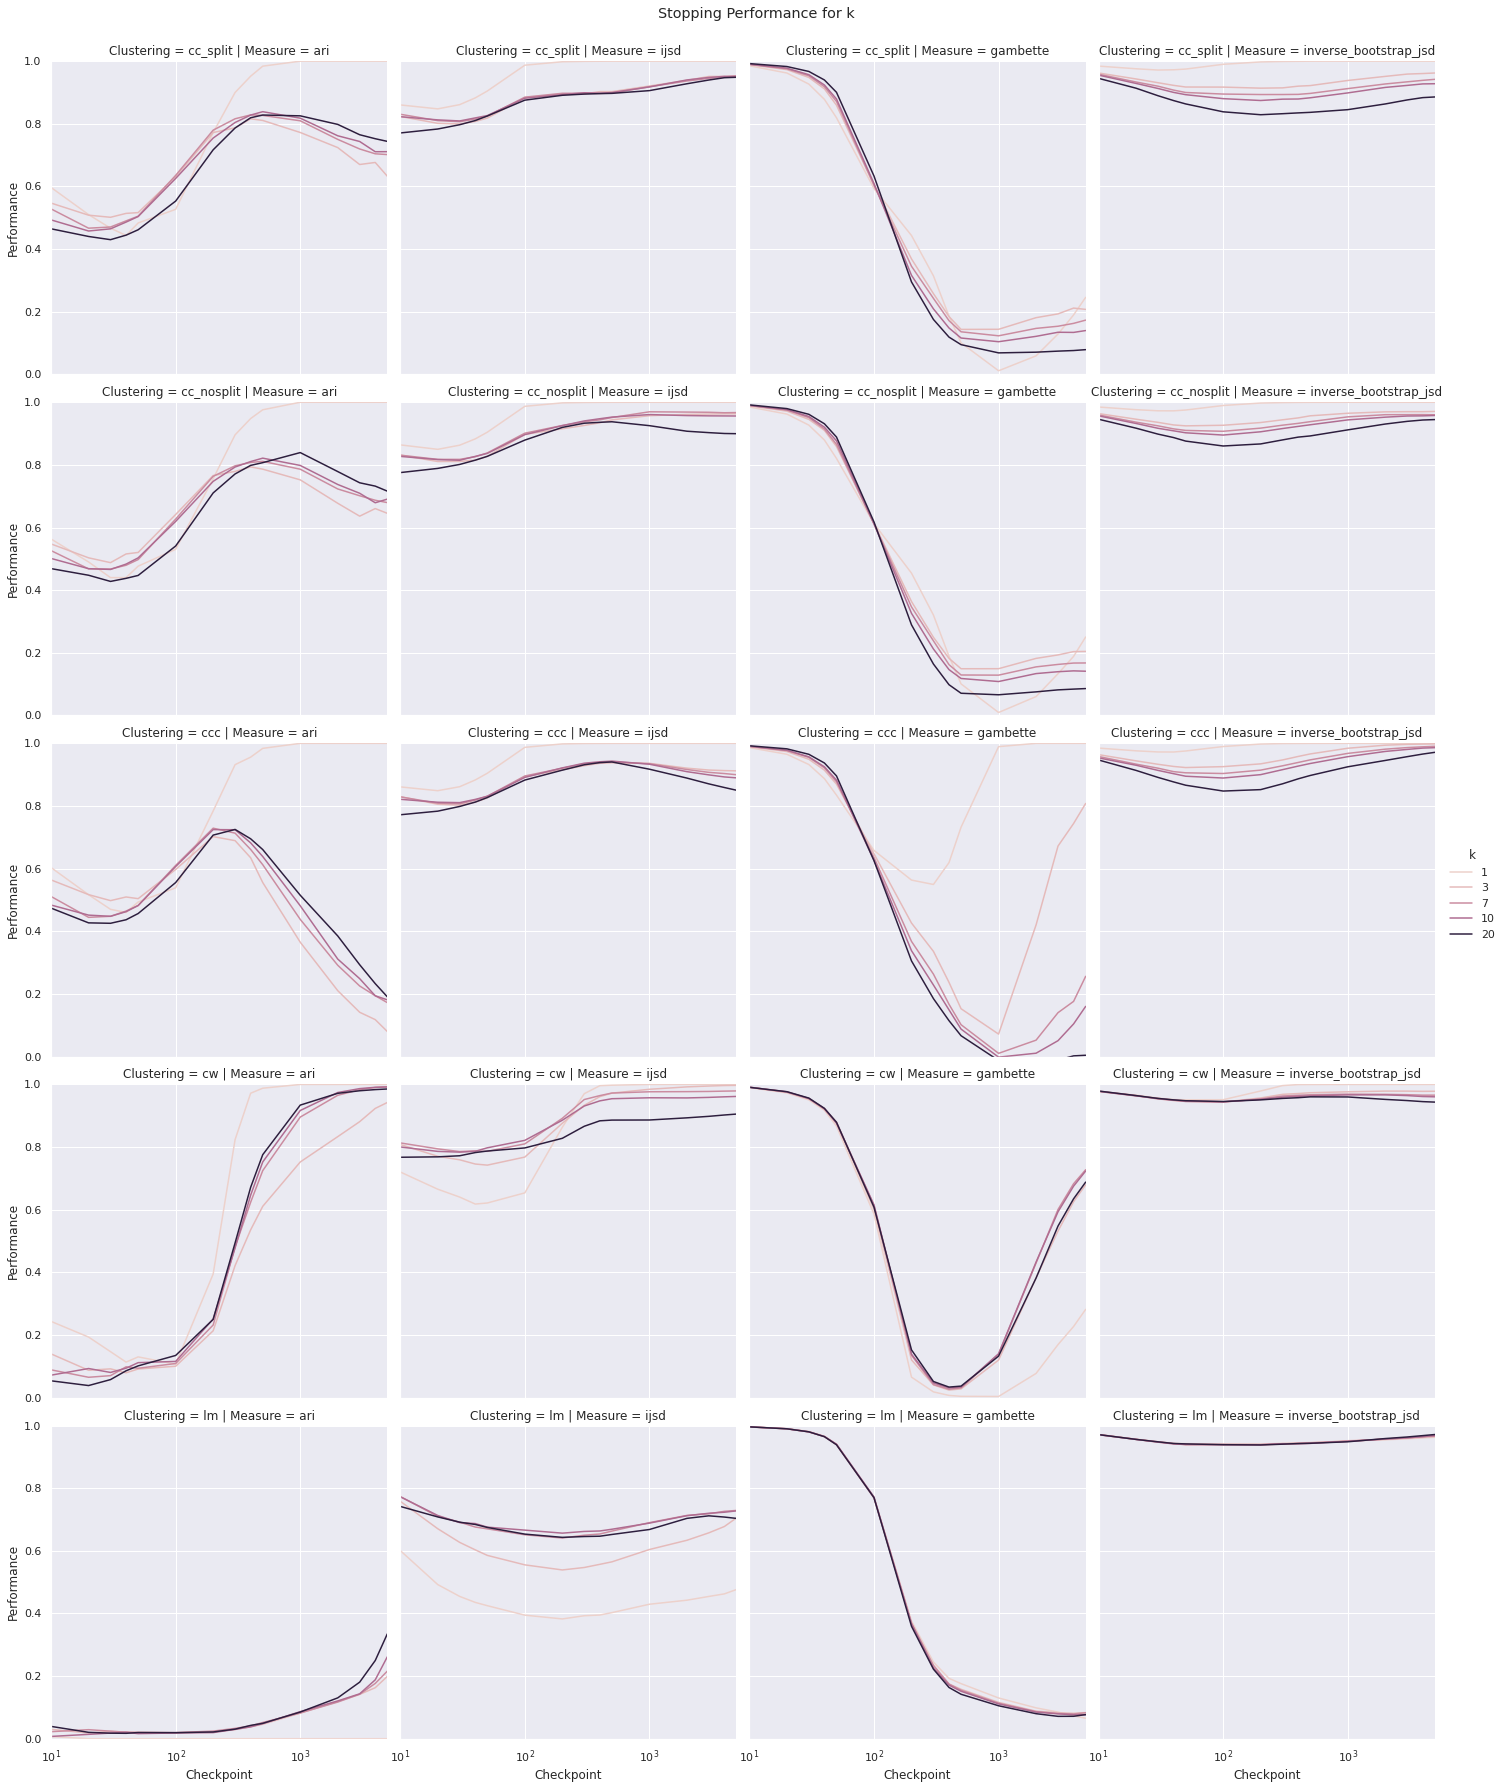

In [45]:
rp = sns.relplot(data=df_ct,
    x='Checkpoint', y='Performance', hue='k', row='Clustering', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Stopping Performance for k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

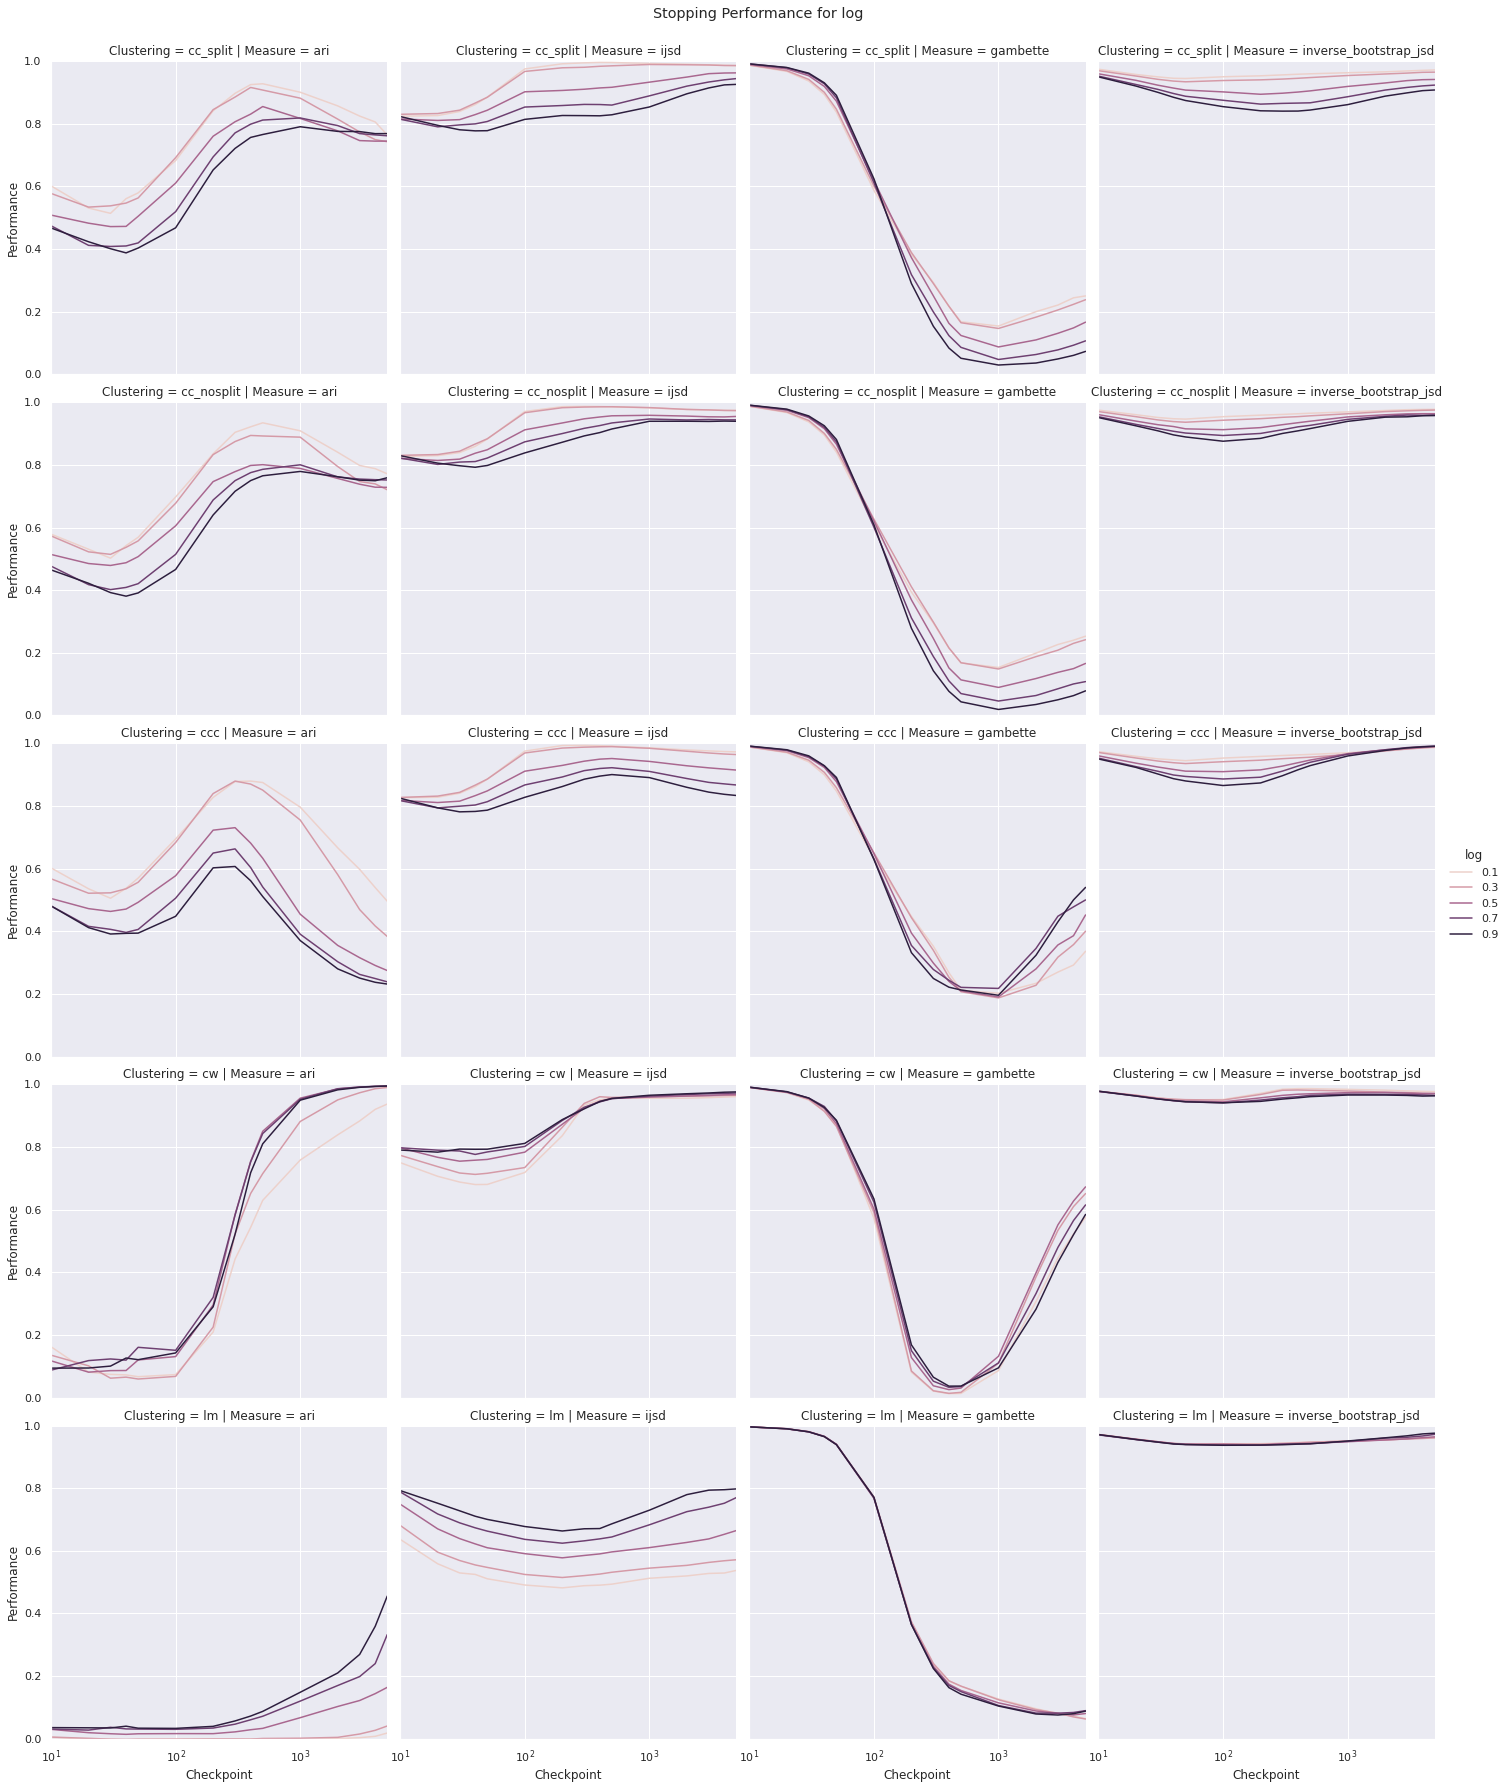

In [46]:
rp = sns.relplot(data=df_ct,
    x='Checkpoint', y='Performance', hue='log', row='Clustering', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Stopping Performance for log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])